<a href="https://colab.research.google.com/github/LucasColas/ML01-Machine-Learning-for-everyone/blob/main/ML01_TD4_Gaussian_Mixture_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML01 : TD4 - Classifieurs génératifs pour mixtures gaussiennes multivariées

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import scipy.stats as stats

from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


# 1. Génération de la base d'apprentissage par gaussiennes multivariées

L'objectif de cette section est de générer une base d'apprentissage à partir d'un modèle de mixture gaussiennes multivariées.
- On se placera dans un contexte où l'on dispose de $d=2$ variables aléatoires descrptives et $K=2$ classes à prédire.
- On générera $n=1000$ observations telles que $n_1 = 500$ observations appartiendront à la classe 1 et $n_2 = 500$ observations à la classe 2.
- Pour chaque observation $i \in \{1,\dots,n\}$, $Y_i$ caractérisera la variable aléatoire décrivant la classe de l'observation $i$.
- Pour chaque observation $i \in \{1,\dots,n\}$, $X_i = [X_{i1},X_{i2}]$ caractérisera le vecteur aléatoire décrivant le profile de l'observation $i$, tel que :

    \begin{equation}
    X_i \sim \mathcal{N}\left(\mu_1, \Sigma \right) \; \text{si} \; Y_i = 1 \quad\quad \text{et} \quad\quad  X_i \sim \mathcal{N}\left(\mu_2, \Sigma \right) \; \text{si} \; Y_i = 2.
    \end{equation}

- On définira pour la suite :

    \begin{equation}
        \mu_1 = [0, 0], \quad \mu_2 = [0, 4], \quad 
        \Sigma = \begin{bmatrix}
                 2 & 1 \\ 
                 1 & 3
                \end{bmatrix}.
    \end{equation}

**Question 1.1.** Générer une base d'apprentissage $\{YTrain, XTrain\}$ selon le modèle introduit ci-dessus. Pour cela, on pourra utiliser la fonction "rng.multivariate_normal" de "np.random.default_rng()".

In [36]:
# RÉPONSE À LA QUESTION 1.1 :
np.random.seed(407)
mu1 = np.array([0,0])
mu2 = np.array([0,4])
cov = np.array([[2,1],[1,3]])

Y_C1 = np.ones((1,500))
Y_C2 = np.ones((1,500)) +1
YTrain = np.concatenate((Y_C1, Y_C2), axis=1).ravel()

XTrain = np.zeros((2, 1000))
rng = np.random.default_rng()
XTrain[:, :500] = rng.multivariate_normal(mu1, cov, size=(500)).T
XTrain[:, 500:] = rng.multivariate_normal(mu2, cov, size=(500)).T
n = 1000

In [31]:
YTrain.shape

(1000,)

**Question 1.2.** Puisque l'on a $d=2$ variables descriptives, on peut représenter les nuages 2 points sur une figure 2D. Représenter les 2 nuages de points (scatter plot) de sorte à bien visualiser les observations de la classe 1 et celles de la classe 2. 

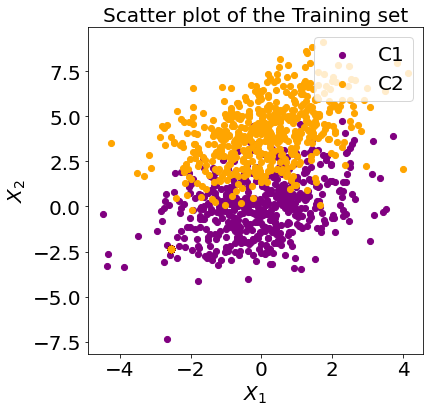

In [28]:
# RÉPONSE À LA QUESTION 1.2 :

figScatter = plt.figure(figsize=(6,6))
ax1 = figScatter.add_subplot(1,1,1)
ax1.scatter(XTrain[0,np.where(YTrain==1)], XTrain[1,np.where(YTrain==1)], color='purple', marker='.', label='C1',s=150)
ax1.scatter(XTrain[0,np.where(YTrain==2)], XTrain[1,np.where(YTrain==2)], color='orange', marker='.', label='C2',s=150)
ax1.legend(fontsize=20, loc='upper right')
ax1.set_xlabel("$X_1$",fontsize=20)
ax1.set_ylabel("$X_2$",fontsize=20)
ax1.set_title("Scatter plot of the Training set",fontsize=20)
ax1.tick_params(axis='x', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)

# 2. Classifieurs LDA, QDA, Naive Bayes par Scikit-Learn

L'objectif de cette section est de calibrer et comparer les 3 classifieurs génératifs que nous avons étudiés depuis le début du cours, c'est à dire : Classifieur de Bayes Naïf, Quadratic Discriminant Analysis (QDA) et Linear Discriminant Analysis (LDA). Pour cela, nous ultiliserons les fonctions déjà implémentées par Scikit-Learn.
Vous trouverez plus d'informations concernant ces fonctions sur les pages suivantes :
- Classifieur de Bayes Naïf : https://scikit-learn.org/stable/modules/naive_bayes.html
- Quadratic Discriminant Analysis : https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis.html#sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis
- Linear Discriminant Analysis : https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html#sklearn.discriminant_analysis.LinearDiscriminantAnalysis

**Question 2.1.** Calibrer les classifieurs Naive Bayes, LDA et QDA sur la base d'apprentissage générée dans la section précédente.

In [34]:
# RÉPONSE À LA QUESTION 2.1 :
gnb = GaussianNB()
y_pred = gnb.fit(XTrain.T, YTrain)


qda = QuadraticDiscriminantAnalysis()
qda.fit(XTrain.T, YTrain)


lda = LinearDiscriminantAnalysis()
lda.fit(XTrain.T, YTrain)


LinearDiscriminantAnalysis()

**Question 2.2.** On souhaite maintenant comparer le taux d'erreurs global de chaque classifieurs sur cette base d'apprentissage. Calculer et comparer les taux d'erreurs globaux des classifieurs empiriques Naive Bayes, LDA et QDA sur la base d'apprentissage. Comment peut-on expliquer ce résultat ?

In [38]:
# RÉPONSE À LA QUESTION 2.2 :

Yhat_CNB = gnb.predict(XTrain.T)
err_CNB = np.sum(Yhat_CNB!=YTrain)/n
print('Taux erreur empirique CNB =', err_CNB)

# Taux erreur empirique QDA :
Yhat_qda = qda.predict(XTrain.T)
err_qda = np.sum(Yhat_qda!=YTrain)/n
print('Taux erreur empirique QDA =', err_qda)

# Taux erreur empirique LDA :
Yhat_lda = lda.predict(XTrain.T)
err_lda = np.sum(Yhat_lda!=YTrain)/n
print('Taux erreur empirique LDA =', err_lda)

Taux erreur empirique CNB = 0.136
Taux erreur empirique QDA = 0.104
Taux erreur empirique LDA = 0.106


On observe que le taux d'erreur du classifieur de Bayes Naïf est plus élevé car il suppose à tord que X1 et X2 sont indépendantes, alors que la matrice de covariance qui était utilisée pour générer les données n'est pas diagonale.

**Question 2.3.** Afficher les forntières de décision de chaque classifieur sur 3 subplots. Pour cela on pourra s'aider de la page Scikit-Learn suivante : https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

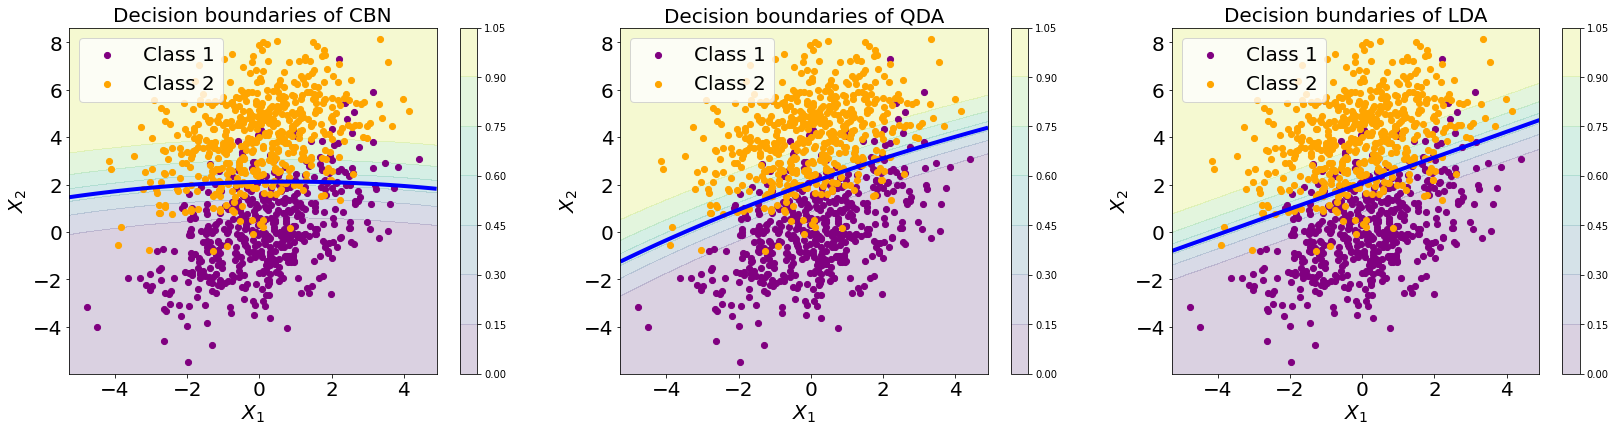

In [42]:
# RÉPONSE À LA QUESTION 2.3 :
XTrain = XTrain.T
# Code by Cyprien Gilet.

# RÉPONSE À LA QUESTION 2.3 :

nn = 50
X1_min, X1_max = XTrain[:, 0].min() - 0.5, XTrain[:, 0].max() + 0.5
X2_min, X2_max = XTrain[:, 1].min() - 0.5, XTrain[:, 1].max() + 0.5
xx1, xx2 = np.meshgrid(np.linspace(X1_min, X1_max, nn), np.linspace(X2_min, X2_max, nn))

# Decision Boundaries for CBN
Z_CNB = gnb.predict_proba(np.c_[xx1.ravel(), xx2.ravel()])
Z_CNB = Z_CNB[:, 1].reshape(xx1.shape)

# Decision Boundaries for QDA
Z_qda = qda.predict_proba(np.c_[xx1.ravel(), xx2.ravel()])
Z_qda = Z_qda[:, 1].reshape(xx1.shape)

# Decision Boundaries for LDA
Z_lda = lda.predict_proba(np.c_[xx1.ravel(), xx2.ravel()])
Z_lda = Z_lda[:, 1].reshape(xx1.shape)


# Plot figure :
figScatter = plt.figure(figsize=(28,14))

ax1 = figScatter.add_subplot(2,3,1)
out_prob = ax1.contourf(xx1, xx2, Z_CNB, alpha=0.2)
out = ax1.contour(xx1, xx2, Z_CNB, [0.5], linewidths=4.0, colors="blue")
ax1.scatter(XTrain[(np.where(YTrain==1)),0].tolist(), XTrain[(np.where(YTrain==1)),1].tolist(), color='purple', marker='.', label='Class 1',s=150)
ax1.scatter(XTrain[(np.where(YTrain==2)),0].tolist(), XTrain[(np.where(YTrain==2)),1].tolist(), color='orange', marker='.', label='Class 2',s=150)
ax1.legend(fontsize=20, loc='upper left')
ax1.set_xlabel("$X_1$",fontsize=20)
ax1.set_ylabel("$X_2$",fontsize=20)
ax1.set_title("Decision boundaries of CBN",fontsize=20)
ax1.tick_params(axis='x', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)
figScatter.colorbar(out_prob)

ax2 = figScatter.add_subplot(2,3,2)
out_prob = ax2.contourf(xx1, xx2, Z_qda, alpha=0.2)
out = ax2.contour(xx1, xx2, Z_qda, [0.5], linewidths=4.0, colors="blue")
ax2.scatter(XTrain[(np.where(YTrain==1)),0].tolist(), XTrain[(np.where(YTrain==1)),1].tolist(), color='purple', marker='.', label='Class 1',s=150)
ax2.scatter(XTrain[(np.where(YTrain==2)),0].tolist(), XTrain[(np.where(YTrain==2)),1].tolist(), color='orange', marker='.', label='Class 2',s=150)
ax2.legend(fontsize=20, loc='upper left')
ax2.set_xlabel("$X_1$",fontsize=20)
ax2.set_ylabel("$X_2$",fontsize=20)
ax2.set_title("Decision boundaries of QDA",fontsize=20)
ax2.tick_params(axis='x', labelsize=20)
ax2.tick_params(axis='y', labelsize=20)
figScatter.colorbar(out_prob)

ax3 = figScatter.add_subplot(2,3,3)
out_prob = ax3.contourf(xx1, xx2, Z_lda, alpha=0.2)
out = ax3.contour(xx1, xx2, Z_lda, [0.5], linewidths=4.0, colors="blue")
ax3.scatter(XTrain[(np.where(YTrain==1)),0].tolist(), XTrain[(np.where(YTrain==1)),1].tolist(), color='purple', marker='.', label='Class 1',s=150)
ax3.scatter(XTrain[(np.where(YTrain==2)),0].tolist(), XTrain[(np.where(YTrain==2)),1].tolist(), color='orange', marker='.', label='Class 2',s=150)
ax3.legend(fontsize=20, loc='upper left')
ax3.set_xlabel("$X_1$",fontsize=20)
ax3.set_ylabel("$X_2$",fontsize=20)
ax3.set_title("Decision bundaries of LDA",fontsize=20)
ax3.tick_params(axis='x', labelsize=20)
ax3.tick_params(axis='y', labelsize=20)
figScatter.colorbar(out_prob)


# 3. Lorsque les matrices de covariances diffèrent par classe

L'objectif de cette section est de générer une nouvelle base d'apprentissage avec les prarmètres suivant :

\begin{equation}
    \mu_1 = [0, 0], \quad \mu_2 = [0, 4], \quad 
    \Sigma_1 = \begin{bmatrix}
             2 & 1 \\ 
             1 & 3
            \end{bmatrix}, \quad 
    \Sigma_2 = \begin{bmatrix}
             6 & -3 \\ 
             -3 & 3.5
            \end{bmatrix}.
\end{equation}

**Question 3.1.** En reprenant le code de la section 1, génerer une nouvelle base d'apprentissage avec ces nouveaux paramètres et afficher le scatter plot associé.

In [43]:
# RÉPONSE À LA QUESTION 3.1 :

np.random.seed(407)
mu1 = np.array([0,0])
mu2 = np.array([0,4])
cov1 = np.array([[2,1],[1,3]])
cov2 = np.array([[6,-3],[-3,3.5]])

Y_C1 = np.ones((1,500))
Y_C2 = np.ones((1,500)) +1
YTrain = np.concatenate((Y_C1, Y_C2), axis=1).ravel()

XTrain = np.zeros((1000, 2))
rng = np.random.default_rng()
XTrain[:500, :] = rng.multivariate_normal(mu1, cov, size=(500))
XTrain[500:, :] = rng.multivariate_normal(mu2, cov, size=(500))
n = 1000

**Question 3.2.** Calibrer les classifieurs Naive Bayes, LDA et QDA sur cette nouvelle base d'apprentissage et calculer leur taux d'erreurs respectifs sur la base d'apprentissage (reprendre le même code que dans la section 2).

In [45]:
# RÉPONSE À LA QUESTION 3.2 :
Yhat_CNB = gnb.predict(XTrain)
err_CNB = np.sum(Yhat_CNB!=YTrain)/n
print('Taux erreur empirique CNB =', err_CNB)

# Taux erreur empirique QDA :
Yhat_qda = qda.predict(XTrain)
err_qda = np.sum(Yhat_qda!=YTrain)/n
print('Taux erreur empirique QDA =', err_qda)

# Taux erreur empirique LDA :
Yhat_lda = lda.predict(XTrain)
err_lda = np.sum(Yhat_lda!=YTrain)/n
print('Taux erreur empirique LDA =', err_lda)


Taux erreur empirique CNB = 0.115
Taux erreur empirique QDA = 0.095
Taux erreur empirique LDA = 0.095


**Question 3.3.** Afficher les forntières de décision de chaque classifieur sur cette nouvelle base de données (en réutilisant les mêmes codes que dans la section 2).

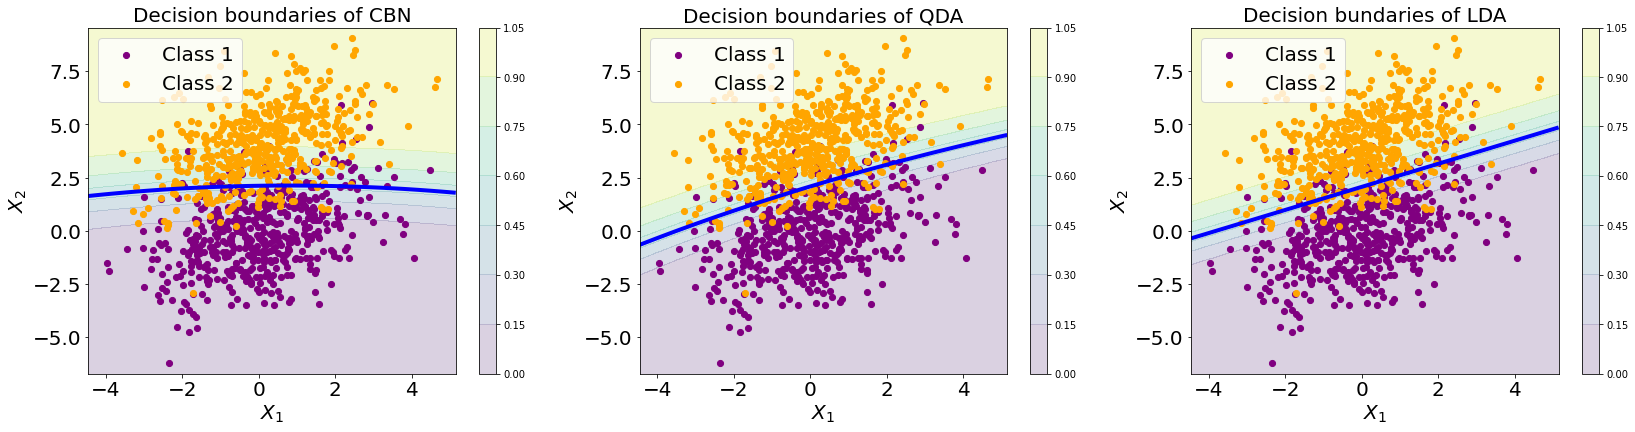

In [46]:
# RÉPONSE À LA QUESTION 3.2 :

# Code by Cyprien Gilet.

nn = 50
X1_min, X1_max = XTrain[:, 0].min() - 0.5, XTrain[:, 0].max() + 0.5
X2_min, X2_max = XTrain[:, 1].min() - 0.5, XTrain[:, 1].max() + 0.5
xx1, xx2 = np.meshgrid(np.linspace(X1_min, X1_max, nn), np.linspace(X2_min, X2_max, nn))

# Decision Boundaries for CBN
Z_CNB = gnb.predict_proba(np.c_[xx1.ravel(), xx2.ravel()])
Z_CNB = Z_CNB[:, 1].reshape(xx1.shape)

# Decision Boundaries for QDA
Z_qda = qda.predict_proba(np.c_[xx1.ravel(), xx2.ravel()])
Z_qda = Z_qda[:, 1].reshape(xx1.shape)

# Decision Boundaries for LDA
Z_lda = lda.predict_proba(np.c_[xx1.ravel(), xx2.ravel()])
Z_lda = Z_lda[:, 1].reshape(xx1.shape)


# Plot figure :
figScatter = plt.figure(figsize=(28,14))

ax1 = figScatter.add_subplot(2,3,1)
out_prob = ax1.contourf(xx1, xx2, Z_CNB, alpha=0.2)
out = ax1.contour(xx1, xx2, Z_CNB, [0.5], linewidths=4.0, colors="blue")
ax1.scatter(XTrain[(np.where(YTrain==1)),0].tolist(), XTrain[(np.where(YTrain==1)),1].tolist(), color='purple', marker='.', label='Class 1',s=150)
ax1.scatter(XTrain[(np.where(YTrain==2)),0].tolist(), XTrain[(np.where(YTrain==2)),1].tolist(), color='orange', marker='.', label='Class 2',s=150)
ax1.legend(fontsize=20, loc='upper left')
ax1.set_xlabel("$X_1$",fontsize=20)
ax1.set_ylabel("$X_2$",fontsize=20)
ax1.set_title("Decision boundaries of CBN",fontsize=20)
ax1.tick_params(axis='x', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)
figScatter.colorbar(out_prob)

ax2 = figScatter.add_subplot(2,3,2)
out_prob = ax2.contourf(xx1, xx2, Z_qda, alpha=0.2)
out = ax2.contour(xx1, xx2, Z_qda, [0.5], linewidths=4.0, colors="blue")
ax2.scatter(XTrain[(np.where(YTrain==1)),0].tolist(), XTrain[(np.where(YTrain==1)),1].tolist(), color='purple', marker='.', label='Class 1',s=150)
ax2.scatter(XTrain[(np.where(YTrain==2)),0].tolist(), XTrain[(np.where(YTrain==2)),1].tolist(), color='orange', marker='.', label='Class 2',s=150)
ax2.legend(fontsize=20, loc='upper left')
ax2.set_xlabel("$X_1$",fontsize=20)
ax2.set_ylabel("$X_2$",fontsize=20)
ax2.set_title("Decision boundaries of QDA",fontsize=20)
ax2.tick_params(axis='x', labelsize=20)
ax2.tick_params(axis='y', labelsize=20)
figScatter.colorbar(out_prob)

ax3 = figScatter.add_subplot(2,3,3)
out_prob = ax3.contourf(xx1, xx2, Z_lda, alpha=0.2)
out = ax3.contour(xx1, xx2, Z_lda, [0.5], linewidths=4.0, colors="blue")
ax3.scatter(XTrain[(np.where(YTrain==1)),0].tolist(), XTrain[(np.where(YTrain==1)),1].tolist(), color='purple', marker='.', label='Class 1',s=150)
ax3.scatter(XTrain[(np.where(YTrain==2)),0].tolist(), XTrain[(np.where(YTrain==2)),1].tolist(), color='orange', marker='.', label='Class 2',s=150)
ax3.legend(fontsize=20, loc='upper left')
ax3.set_xlabel("$X_1$",fontsize=20)
ax3.set_ylabel("$X_2$",fontsize=20)
ax3.set_title("Decision bundaries of LDA",fontsize=20)
ax3.tick_params(axis='x', labelsize=20)
ax3.tick_params(axis='y', labelsize=20)
figScatter.colorbar(out_prob)
